In [4]:
#!pip install tensorflow

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# Step 2: Preprocess the data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
file_path1="C:\\Users\\ganya\\OneDrive\\Documents\\IIT GANYA\\SPRING 2023\\OSNA\\Project -2\\prepro_train.csv"
train_df = pd.read_csv(file_path1)
file_path2="C:\\Users\\ganya\\OneDrive\\Documents\\IIT GANYA\\SPRING 2023\\OSNA\\Project -2\\prepro_test.csv"
test_df = pd.read_csv(file_path2)

In [8]:
train_df['title1_en']=train_df['title1_en'].apply(str)
train_df['title2_en']=train_df['title2_en'].apply(str)
test_df['title1_en']=test_df['title1_en'].apply(str)b
test_df['title2_en']=test_df['title2_en'].apply(str)

In [9]:
# initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function to perform lemmatization on a sentence
def lemmatize_sentence(sentence):
    # tokenize the sentence into words
    token_words = nltk.word_tokenize(sentence)
    # lemmatize each word in the sentence
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(w) for w in token_words])
    return lemmatized_sentence

In [10]:
import nltk

#nltk.download('punkt')

#nltk.download('omw-1.4')


train_df['title1_en'] = train_df['title1_en'].apply(lemmatize_sentence)
train_df['title2_en'] = train_df['title2_en'].apply(lemmatize_sentence)
test_df['title1_en'] = test_df['title1_en'].apply(lemmatize_sentence)
test_df['title2_en'] = test_df['title2_en'].apply(lemmatize_sentence)

In [28]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['title1_en'].values)
word_index = tokenizer.word_index

In [30]:
# Pad the sequences
train_sequences = tokenizer.texts_to_sequences(train_df['title1_en'].values)
train_padded = pad_sequences(train_sequences, maxlen=30, padding='post', truncating='post')
test_sequences = tokenizer.texts_to_sequences(test_df['title1_en'].values)
test_padded = pad_sequences(test_sequences, maxlen=30, padding='post', truncating='post')

In [31]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1, 64, input_length=30),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [32]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Convert the labels to one-hot encoding
train_labels = pd.get_dummies(train_df['label']).values


In [37]:
# Train the model
model.fit(train_padded, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
6412/6412 [==============================] - 148s 23ms/step - loss: 0.2766 - accuracy: 0.8744 - val_loss: 1.0689 - val_accuracy: 0.6151
Epoch 2/10
6412/6412 [==============================] - 153s 24ms/step - loss: 0.2749 - accuracy: 0.8757 - val_loss: 1.0250 - val_accuracy: 0.6208
Epoch 3/10
6412/6412 [==============================] - 152s 24ms/step - loss: 0.2744 - accuracy: 0.8755 - val_loss: 1.0460 - val_accuracy: 0.6269
Epoch 4/10
6412/6412 [==============================] - 163s 25ms/step - loss: 0.2737 - accuracy: 0.8763 - val_loss: 1.0541 - val_accuracy: 0.6379
Epoch 5/10
6412/6412 [==============================] - 163s 25ms/step - loss: 0.2721 - accuracy: 0.8764 - val_loss: 0.9883 - val_accuracy: 0.6270
Epoch 6/10
6412/6412 [==============================] - 160s 25ms/step - loss: 0.2709 - accuracy: 0.8772 - val_loss: 1.0612 - val_accuracy: 0.5979
Epoch 7/10
6412/6412 [==============================] - 154s 24ms/step - loss: 0.2709 - accuracy: 0.8774 - val_loss: 1

Epoch 1/10
6412/6412 [==============================] - 188s 29ms/step - loss: 0.2672 - accuracy: 0.8785 - val_loss: 1.0625 - val_accuracy: 0.6004
Epoch 2/10
6412/6412 [==============================] - 179s 28ms/step - loss: 0.2670 - accuracy: 0.8784 - val_loss: 1.0207 - val_accuracy: 0.6284
Epoch 3/10
6412/6412 [==============================] - 182s 28ms/step - loss: 0.2667 - accuracy: 0.8787 - val_loss: 1.0836 - val_accuracy: 0.6255
Epoch 4/10
6412/6412 [==============================] - 178s 28ms/step - loss: 0.2659 - accuracy: 0.8789 - val_loss: 1.0925 - val_accuracy: 0.6157
Epoch 5/10
6412/6412 [==============================] - 182s 28ms/step - loss: 0.2659 - accuracy: 0.8791 - val_loss: 1.0391 - val_accuracy: 0.6207
Epoch 6/10
6412/6412 [==============================] - 184s 29ms/step - loss: 0.2650 - accuracy: 0.8794 - val_loss: 1.1016 - val_accuracy: 0.6041
Epoch 7/10
6412/6412 [==============================] - 177s 28ms/step - loss: 0.2639 - accuracy: 0.8795 - val_loss: 1

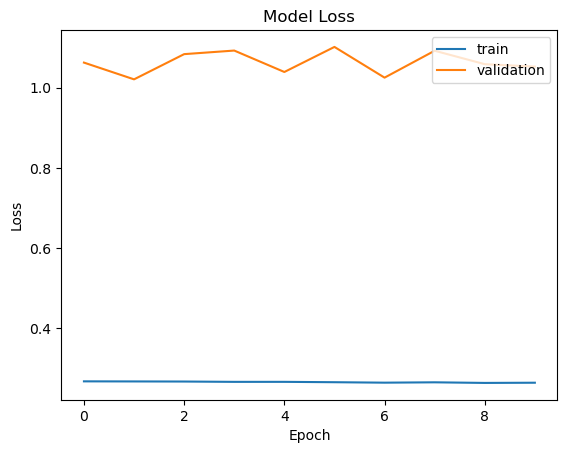

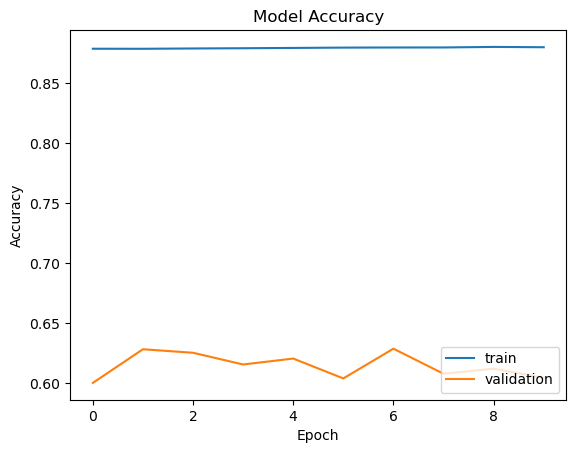

In [38]:
import matplotlib.pyplot as plt

# Train the model and obtain the history object
history = model.fit(train_padded, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
